## Models robustness to recover the ground truth weights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data generation

We generate a dataset where X and y are linearly linked: 

10 of the features of X will be used to generate y.

The other features are not useful at predicting y.

In addition, we generate a dataset where n_samples == n_features. Such a setting is challenging for an OLS model and leads potentially to arbitrary large weights.

Having a prior on the weights and a penalty alleviates the problem. Finally, gaussian noise is added.

In [2]:
from sklearn.datasets import make_regression

X, y, true_weights = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=8,              # adding noise 
    coef=True,
    random_state=42,
)

## Fit the regressors

We now fit both Bayesian models and the OLS to compare the models’ coefficients.

In [3]:
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression


lr = LinearRegression().fit(X, y)
bay = BayesianRidge().fit(X, y)
ard = ARDRegression().fit(X, y)

In [4]:
coef_df = pd.DataFrame(data={
    'OLS' : lr.coef_,
    'Bayes':bay.coef_,
    'ARD':ard.coef_,
    'truth':true_weights
})

coef_df.head()

,OLS,Bayes,ARD,truth
0,3.620698,-0.631933,-0.985165,0.000000
1,-2.674910,-3.250621,-0.001756,0.000000
2,-5.144672,-2.509021,-0.000103,0.000000
3,7.483048,2.541967,-0.000388,0.000000
4,37.136806,34.489623,33.224386,32.125517


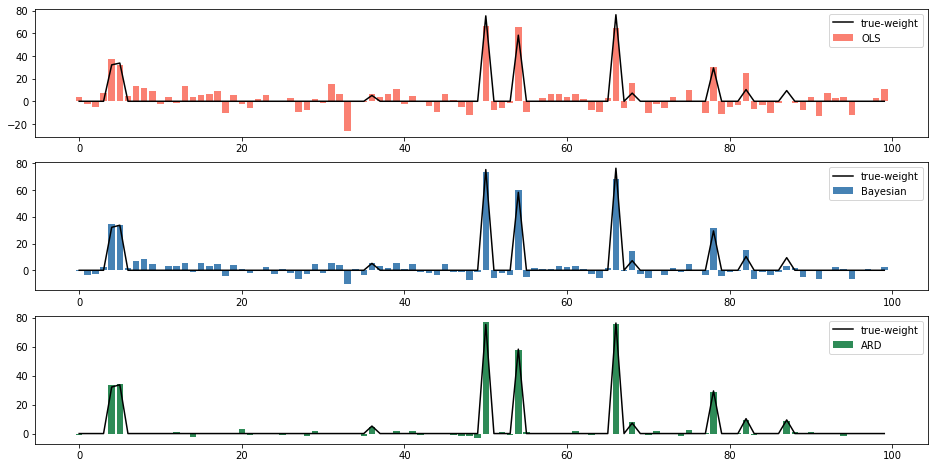

In [5]:
plt.figure(figsize=(16, 8))

plt.subplot(3,1,1)
plt.plot(true_weights, color='k', label='true-weight')
plt.bar(coef_df.index, coef_df.OLS, color='salmon', label='OLS')
plt.legend();
plt.subplot(3,1,2)
plt.plot(true_weights, color='k', label='true-weight')
plt.bar(coef_df.index, coef_df.Bayes, color='steelblue', label='Bayesian')
plt.legend();
plt.subplot(3,1,3)
plt.plot(true_weights, color='k', label='true-weight')
plt.bar(coef_df.index, coef_df.ARD, color='seagreen', label='ARD')
plt.legend();

Due to the added noise, none of the models recover the true weights.

Indeed, all models always have more than 10 non-zero coefficients.

Compared to the OLS estimator, the coefficients using a Bayesian Ridge regression are slightly shifted toward zero, which stabilises them.

The ARD regression provides a sparser solution: some of the non-informative coefficients are set exactly to zero, while shifting others closer to zero. Some non-informative coefficients are still present and retain large values.